In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve

In [11]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    return plt

In [12]:
def evaluatePerformance(trials):
    filename = 'data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n,d = X.shape

    # shuffle the data
    idx = np.arange(n)
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    stats = np.zeros((3,2))
    clf = tree.DecisionTreeClassifier()
    
    stats = np.zeros((3,2))
    
    estimator = SVC()
    
    # split 10 fold
    #kf =KFold(n_splits=10, shuffle=True, random_state=42)

    print("_______________Train model evaluation_______________")
    # split()  method generate indices to split data into training and test set.
    length = int(len(idx)/10) #length of each fold
    train_idx = []
    #temp_list = idx
    test_idx = idx
    for j in range(trials):
        for i in range(9):
            # Train index
            train_idx = idx[i*length:(i+1)*length]
            # Test index
            test_idx_1 = idx[:i*length] 
            test_idx_2 = idx[(i+1)*length:]
            test_idx_1 = test_idx_1.tolist()
            test_idx_2 = test_idx_2.tolist()
            test_idx = np.array(test_idx_2 + test_idx_1)
        
            Xtrain = X[train_idx,:]  # train on first 100 instances
            Xtest = X[test_idx,:]
            ytrain = y[train_idx,:]  # test on remaining instances
            ytest = y[test_idx,:]
        
            # train the decision tree
            clf = clf.fit(Xtrain,ytrain)
        
            # output predictions on the remaining data
            y_pred = clf.predict(Xtest)
            # compute the training accuracy of the model
            meanDecisionTreeAccuracy = accuracy_score(ytest, y_pred)

            # make certain that the return value matches the API specification
            stats[0,0] = meanDecisionTreeAccuracy
            print("Decision Tree Accuracy Fold_%s" %i,"_trials_%s = " %j, stats[0,0])
            
            plot_learning_curve(estimator, X = Xtrain, y = ytrain, ax = ax1, train_sizes=np.linspace(.1, 1.0, 5))
            plot_learning_curve(estimator, X = Xtrain, y = ytrain, ax = ax2, train_sizes=np.linspace(.5, 1.0, 5))
            plt.show()
        
        train_idx = idx[9*length:len(data)]
        test_idx = idx[:9*length+1]
        Xtrain = X[train_idx,:]  # train on first 100 instances
        Xtest = X[test_idx,:]
        ytrain = y[train_idx,:]  # test on remaining instances
        ytest = y[test_idx,:]

        # train the decision tree
        clf = clf.fit(Xtrain,ytrain)

        # output predictions on the remaining data
        y_pred = clf.predict(Xtest)
        # compute the training accuracy of the model
        meanDecisionTreeAccuracy = accuracy_score(ytest, y_pred)
        stats[0,0] = meanDecisionTreeAccuracy
        print("Decision Tree Accuracy Fold_9_trials_%s = " %j, stats[0,0])
    return clf, stats

_______________Train model evaluation_______________
Decision Tree Accuracy Fold_0 _trials_0 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


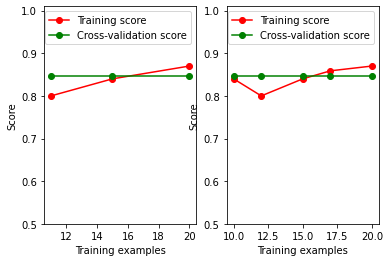

Decision Tree Accuracy Fold_1 _trials_0 =  0.5975103734439834
Decision Tree Accuracy Fold_2 _trials_0 =  0.6763485477178424
Decision Tree Accuracy Fold_3 _trials_0 =  0.7261410788381742
Decision Tree Accuracy Fold_4 _trials_0 =  0.6597510373443983
Decision Tree Accuracy Fold_5 _trials_0 =  0.6929460580912863
Decision Tree Accuracy Fold_6 _trials_0 =  0.6804979253112033
Decision Tree Accuracy Fold_7 _trials_0 =  0.7178423236514523
Decision Tree Accuracy Fold_8 _trials_0 =  0.7427385892116183


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_0 =  0.7063829787234043
Decision Tree Accuracy Fold_0 _trials_1 =  0.7676348547717843
Decision Tree Accuracy Fold_1 _trials_1 =  0.6141078838174274


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_2 _trials_1 =  0.6763485477178424
Decision Tree Accuracy Fold_3 _trials_1 =  0.7219917012448133
Decision Tree Accuracy Fold_4 _trials_1 =  0.7178423236514523
Decision Tree Accuracy Fold_5 _trials_1 =  0.6763485477178424
Decision Tree Accuracy Fold_6 _trials_1 =  0.7551867219917012
Decision Tree Accuracy Fold_7 _trials_1 =  0.7551867219917012
Decision Tree Accuracy Fold_8 _trials_1 =  0.7219917012448133


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_1 =  0.7276595744680852
Decision Tree Accuracy Fold_0 _trials_2 =  0.7676348547717843
Decision Tree Accuracy Fold_1 _trials_2 =  0.6348547717842323


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_2 _trials_2 =  0.6763485477178424
Decision Tree Accuracy Fold_3 _trials_2 =  0.7219917012448133
Decision Tree Accuracy Fold_4 _trials_2 =  0.7178423236514523
Decision Tree Accuracy Fold_5 _trials_2 =  0.7012448132780082
Decision Tree Accuracy Fold_6 _trials_2 =  0.7053941908713693
Decision Tree Accuracy Fold_7 _trials_2 =  0.7468879668049793
Decision Tree Accuracy Fold_8 _trials_2 =  0.6929460580912863


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_2 =  0.6936170212765957
Decision Tree Accuracy Fold_0 _trials_3 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_1 _trials_3 =  0.6141078838174274
Decision Tree Accuracy Fold_2 _trials_3 =  0.6763485477178424
Decision Tree Accuracy Fold_3 _trials_3 =  0.7178423236514523
Decision Tree Accuracy Fold_4 _trials_3 =  0.7302904564315352
Decision Tree Accuracy Fold_5 _trials_3 =  0.6721991701244814
Decision Tree Accuracy Fold_6 _trials_3 =  0.7593360995850622
Decision Tree Accuracy Fold_7 _trials_3 =  0.7510373443983402
Decision Tree Accuracy Fold_8 _trials_3 =  0.7468879668049793


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_3 =  0.7489361702127659
Decision Tree Accuracy Fold_0 _trials_4 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_1 _trials_4 =  0.5975103734439834
Decision Tree Accuracy Fold_2 _trials_4 =  0.6431535269709544
Decision Tree Accuracy Fold_3 _trials_4 =  0.7219917012448133
Decision Tree Accuracy Fold_4 _trials_4 =  0.6680497925311203
Decision Tree Accuracy Fold_5 _trials_4 =  0.6721991701244814
Decision Tree Accuracy Fold_6 _trials_4 =  0.6929460580912863
Decision Tree Accuracy Fold_7 _trials_4 =  0.7219917012448133
Decision Tree Accuracy Fold_8 _trials_4 =  0.7344398340248963


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_4 =  0.7404255319148936
Decision Tree Accuracy Fold_0 _trials_5 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_1 _trials_5 =  0.5975103734439834
Decision Tree Accuracy Fold_2 _trials_5 =  0.6639004149377593
Decision Tree Accuracy Fold_3 _trials_5 =  0.7053941908713693
Decision Tree Accuracy Fold_4 _trials_5 =  0.7302904564315352
Decision Tree Accuracy Fold_5 _trials_5 =  0.6929460580912863
Decision Tree Accuracy Fold_6 _trials_5 =  0.6970954356846473
Decision Tree Accuracy Fold_7 _trials_5 =  0.7261410788381742
Decision Tree Accuracy Fold_8 _trials_5 =  0.7551867219917012


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_5 =  0.7361702127659574
Decision Tree Accuracy Fold_0 _trials_6 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_1 _trials_6 =  0.5767634854771784
Decision Tree Accuracy Fold_2 _trials_6 =  0.6431535269709544
Decision Tree Accuracy Fold_3 _trials_6 =  0.7219917012448133
Decision Tree Accuracy Fold_4 _trials_6 =  0.6639004149377593
Decision Tree Accuracy Fold_5 _trials_6 =  0.6639004149377593
Decision Tree Accuracy Fold_6 _trials_6 =  0.7302904564315352
Decision Tree Accuracy Fold_7 _trials_6 =  0.7427385892116183
Decision Tree Accuracy Fold_8 _trials_6 =  0.7717842323651453


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_6 =  0.7148936170212766
Decision Tree Accuracy Fold_0 _trials_7 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_1 _trials_7 =  0.6141078838174274
Decision Tree Accuracy Fold_2 _trials_7 =  0.6639004149377593
Decision Tree Accuracy Fold_3 _trials_7 =  0.7261410788381742
Decision Tree Accuracy Fold_4 _trials_7 =  0.6680497925311203
Decision Tree Accuracy Fold_5 _trials_7 =  0.7053941908713693
Decision Tree Accuracy Fold_6 _trials_7 =  0.7053941908713693
Decision Tree Accuracy Fold_7 _trials_7 =  0.7551867219917012
Decision Tree Accuracy Fold_8 _trials_7 =  0.7468879668049793


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_7 =  0.6936170212765957
Decision Tree Accuracy Fold_0 _trials_8 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_1 _trials_8 =  0.5975103734439834
Decision Tree Accuracy Fold_2 _trials_8 =  0.6639004149377593
Decision Tree Accuracy Fold_3 _trials_8 =  0.7261410788381742
Decision Tree Accuracy Fold_4 _trials_8 =  0.7053941908713693
Decision Tree Accuracy Fold_5 _trials_8 =  0.6970954356846473
Decision Tree Accuracy Fold_6 _trials_8 =  0.7302904564315352
Decision Tree Accuracy Fold_7 _trials_8 =  0.7510373443983402
Decision Tree Accuracy Fold_8 _trials_8 =  0.7302904564315352


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_8 =  0.7574468085106383
Decision Tree Accuracy Fold_0 _trials_9 =  0.7676348547717843


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_1 _trials_9 =  0.6141078838174274
Decision Tree Accuracy Fold_2 _trials_9 =  0.6763485477178424
Decision Tree Accuracy Fold_3 _trials_9 =  0.7219917012448133
Decision Tree Accuracy Fold_4 _trials_9 =  0.6680497925311203
Decision Tree Accuracy Fold_5 _trials_9 =  0.6929460580912863
Decision Tree Accuracy Fold_6 _trials_9 =  0.7261410788381742
Decision Tree Accuracy Fold_7 _trials_9 =  0.7551867219917012
Decision Tree Accuracy Fold_8 _trials_9 =  0.7510373443983402


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Accuracy Fold_9_trials_9 =  0.7319148936170212


In [13]:
if __name__ == "__main__":
    fig, (ax1, ax2) = plt.subplots(1, 2)
    trials = 10
    clf, stats = evaluatePerformance(trials)

In [ ]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]  
    y = iris.target

    # Shuffle
    # <array>.shape returns the dimensions of the array
    # arange (start,stop,step) creates a 1-D vector
    idx = np.arange(X.shape[0])  # returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)  # Seed the randomization 
    np.random.shuffle(idx)  # Shuffle in place based on the seeded randomization
    
    X = X[idx]   # re-sort X randomly based on IDX as indices
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)    # Take the mean over the first axis (long axis)
    std = X.std(axis=0)
    X = (X - mean) / std   # Normalize to a 'normal distribution'

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Ravel creates a 1-D view of the vector
    # c_ concatenates 1D vectors into columns of a 2D array, basically
    #    making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [20]:
filename = 'data/SPECTF.dat'
data = np.loadtxt(filename, delimiter=',')
X = data[:, 1:]
y = np.array([data[:, 0]]).T
n,d = X.shape
print(X)
print(y)

[[59. 52. 70. ... 74. 64. 67.]
 [72. 62. 69. ... 71. 56. 58.]
 [71. 62. 70. ... 41. 51. 46.]
 ...
 [75. 73. 72. ... 75. 67. 71.]
 [59. 62. 72. ... 76. 70. 70.]
 [64. 66. 68. ... 64. 57. 54.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [32]:
length = int(len(idx)/10) #length of each fold
idx = np.arange(n)
train_idx = idx[1*length:(1+1)*length]
# Test index
test_idx_1 = idx[:1*length] 
test_idx_2 = idx[(1+1)*length:]
test_idx_1 = test_idx_1.tolist()
test_idx_2 = test_idx_2.tolist()
test_idx = np.array(test_idx_2 + test_idx_1)

Xtrain = X[train_idx,:]  # train on first 100 instances
Xtest = X[test_idx,:]
ytrain = y[train_idx,:]  # test on remaining instances
ytest = y[test_idx,:]
print(ytest)
print(Xtrain)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.